# Probability Distributions

# Outline

1. Introduction

2. What is a PDF?

3. Famous distributions

Let's consider now an experiment that has some discrete outcomes $A_j$ with $j=1,2,\dots$ and $P(A_j)$.
We should respect the laws of probability

The probability is always a positive number

\begin{equation}
P(A_j) \ge 0 \;\; \forall \;\; A_j|
\end{equation}

 The probability is normalised

\begin{equation}
\sum_jP(A_j) =1
\end{equation}



We now consider the outcome of an experiment of a measurement that is not an integer. Let $x$ be any real number, we define a probability distribution $f(x)$ a function having the following properties


\begin{eqnarray}
f(x) &\ge&0\\
\int dx f(x)&=&1\\
P(a\le x\le b)&=&\int_a^b f(x)dx
\end{eqnarray}

Since we deal with continuous functions most of the time we need to define the probability in a range. $f(x)$ is called probability density function (PDF).


### Lest start with a simple example
#### What is the probability distribution of obtaining heads after 4 coin flips (assuming a fair coin)?
We need to calculate the probabilities for each outcome:
1. $P(head=0;4~throws)=P(TTTT)=P(!h)P(!h)P(!h)P(!h)=\frac{1}{16}$
2. $P(head=1;4~throws)=P(HTTT)+P(THTT)+P(TTHT)+P(TTTH)=\frac{4}{16}$
3. $P(head=2;4~throws)=P(HHTT)+P(THHT)+P(TTHH)+P(HTHT)+P(THTH)+P(HTTH)=\frac{6}{16}$
4. $P(head=3;4~throws)=P(head=1;4~throws)=\frac{4}{16}$
5. $P(head=4;4~throws)=P(head=0;4~throws)=\frac{1}{16}$

# Example

Consider the function


\begin{eqnarray}
f(x)=\left\{ \begin{array}{cc}
0 & x < 0 \\
a\exp(-ax)& x\ge0\end{array}\right.
\end{eqnarray}


Can we build a probability densfity function (PDF) out of it?


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

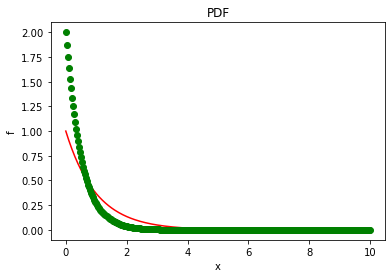

In [61]:
def func(x,a):
    res=a*np.exp(-a*x)
    return res;
    
x = np.linspace(0, 10, 300)
y = func(x,1)
y2 = func(x,2)
plt.title('PDF')
plt.xlabel('x')
plt.ylabel('f')
plt.plot(x, y, '-', color='red'); 
plt.plot(x, y2, 'o', color='green'); 
plt.show()

### We notice that:


It is single valued


it is positive everywhere


 it is normalised


\begin{eqnarray}
\int_{-\infty}^{\infty} f(x)dx&=&\int_0^{\infty} a \exp(-ax)dx=\left. -exp(-ax)\right|_0^{\infty}=1
\end{eqnarray}


So it is a PDF!!
#### Note that the PDF doesnt have to be below 1.0

From PDF we can calculate a probability.


\begin{eqnarray}
\int_{x_a}^{x_b} f(x)dx&=&\int_{x_a}^{x_b} a \exp(-ax)dx\\
&=&\exp(-ax_a)-\exp(-ax_b)
\end{eqnarray}


Notice that the PDF in a point x can have a value greater than 1. What matters is that the interval is < 1

# CDF

We define a cumulative probability distribution (CDF) as


\begin{eqnarray}
F(x)=\int_{-\infty}^{x} f(y)dy
\end{eqnarray}


In [63]:
from sympy import integrate
from sympy import symbols
from sympy import exp

x,a = symbols('x, a')
integrate(a*exp(-a*x),x)

-exp(-a*x)

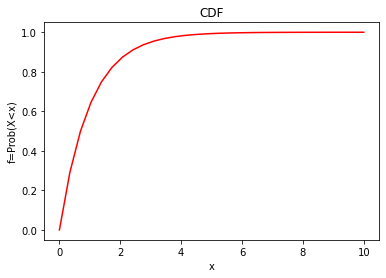

In [65]:
a=1
def cdf(x):
    res=1-a*np.exp(-a*x)
    return res;
    
x = np.linspace(0, 10, 30)
y = cdf(x)
plt.title('CDF')
plt.xlabel('x')
plt.ylabel('f=Prob(X<x)')
plt.plot(x, y, '-', color='red'); 

### To characterise the distribution, we can define the moments as

\begin{eqnarray}
M_m=\int_{-\infty}^{\infty} x^mf(x)dx=\langle x^m \rangle
\end{eqnarray}

#### The $M_0$ moment is just the normalisation 

\begin{eqnarray}
M_0=\int_{-\infty}^{\infty} x^0f(x)dx=1
\end{eqnarray}

#### The $M_1$ is the mean

\begin{eqnarray}
M_1=\int_{-\infty}^{\infty} x^1f(x)dx
\end{eqnarray}


### There is an obvious parallel between expectation values and a mean of a data sample:
$\lim_{N\to\infty}{\overline{f}}\to \langle f\rangle$

### The variance of a distribution can be calculated as


\begin{eqnarray}
\sigma^2&=&\langle (x-\langle x \rangle)^2\rangle\\
&=&\langle x^2-2x\langle x \rangle +\langle x \rangle^2\rangle\\
&=&\langle x^2 \rangle -2\langle x \rangle \langle x \rangle+\langle x \rangle^2\\
&=&M_2-2\langle x \rangle^2+\langle x \rangle^2\\
&=&M_2-M_1^2
\end{eqnarray}



# Famous distributions

We have different probability distributions, but the most know/used are


1. Binomial distribution (discrete)

2. Poisson distribution (discrete)

3.  Gaussian distribution (continuos)

4. Student's t distribution (continuous)


other distributions exist, but they are less interesting for us.

# Binomial distribution

It is used to describe process with a given number of identical trials with two possible outcomes that we define as


1.  $p$: success probability


2.  $1-p$ failure probability


This is the distribution to describe the outcome of tossing a coin for example


The probability distribution of having a number of success events $r$ out of $n$ trials is given by

\begin{eqnarray}
P_B(r;p,n)  =  p^r(1-p)^{n-r}\frac{n!}{r!(n-r)!}.
\end{eqnarray}

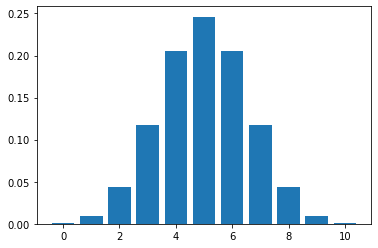

In [68]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 10
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist)
plt.show()


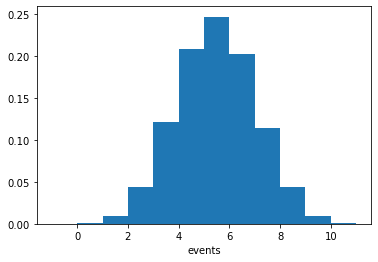

In [105]:
from numpy import random
import matplotlib.pyplot as plt

ntrial=10
prob=0.5
data=random.binomial(n=ntrial, p=prob, size=10000)
plt.hist(data, bins=12, range=(-1,11), density=True) #density to normalise area
plt.xlabel("events")
plt.show()

### Here, the first two terms are the probability for the drawing of $r$ successes followed by $n-r$ failures. The last term is the number of possible re-orderings of the events. 
#### The main properties of this distribution are (mean/variance)

\begin{eqnarray}
%\sum_{r=0}^nP(r,p,n)&=&1\\
\langle r \rangle& =& pn\\
V(r) &=&np(1-p)
\end{eqnarray}

# Poisson distribution

### The Poisson distribution deals with random events and is defined only by it's fixed average expected number of events  (it is used for example  to describe radioactive decays) and is in practice the infinite limit of the binomial distribution for an (infinitely) large pot with (infinitely) small individual probabilities.

$P(r,\lambda)  = \frac{e^{-\lambda}\lambda^r}{r!}$

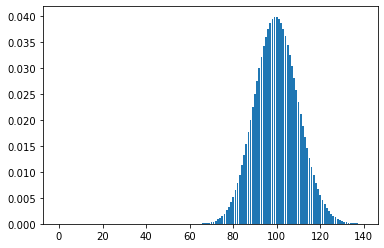

In [108]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
# setting the values
lambd = 100
# defining list of r values
r_values = list(range(140))
# list of pmf values
dist = [poisson.pmf(r, lambd) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist)
plt.show()


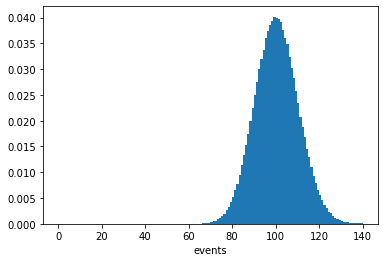

In [112]:
from numpy import random
import matplotlib.pyplot as plt

lambd=100
data=random.poisson(lam=lambd, size=1000000)
plt.hist(data, bins=140, range=(0,140), density=True)
plt.xlabel("events")
plt.show()


### The properties of this distribution are

\begin{eqnarray}
\langle r \rangle =\lambda\\
V(r)=\lambda
\end{eqnarray}

# Key point to remember:
### for a Poisson distribution the standard deviation is just the square root of the mean number of events.
#### Think about what is the uncertainty of the number of counts in a histogram? 

# Gaussian Distribution


### Another common distribution is the Gaussian one. (Prob one of the most important one)
#### It reads



\begin{eqnarray*}
P(x;\mu,\sigma) &=& \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2} \\
\end{eqnarray*}

#### The properties of the distribution are

\begin{eqnarray}
\langle r \rangle =\mu\\ 
V(x)=\sigma^2
\end{eqnarray} 
#### $\mu\$ is also the mode and the median


In [113]:
def gaus(sigma,mu,x):
    resg=1/(sigma * np.sqrt(2 * np.pi))* np.exp( - (x - mu)**2 / (2 * sigma**2))
    return resg;
    

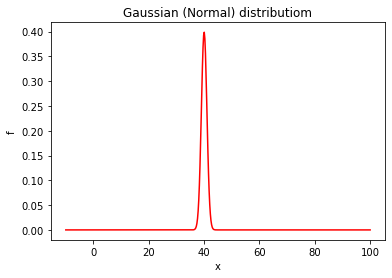

In [8]:
sigma=1
mu=40

x = np.linspace(-10, 100, 500)
y = gaus(sigma,mu,x)
plt.title('Gaussian (Normal) distributiom')
plt.xlabel('x')
plt.ylabel('f')
plt.plot(x, y, '-', color='red');


# How the Gaussian compares to other distributions?

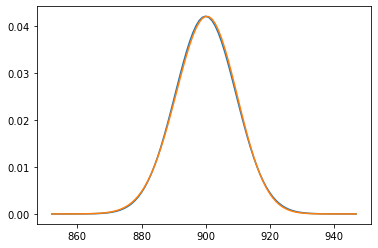

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
n=1000
p=0.9
mu = n*p
variance = n*p*(1-p)
sigma = math.sqrt(variance)
low= int(mu - 5*sigma)
high= int(mu + 5*sigma)
bins=high-low+1
x = np.linspace(low, high, bins)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Gaussian')
plt.plot(x, stats.binom.pmf(x, n, p), label='Binomial')
plt.show()


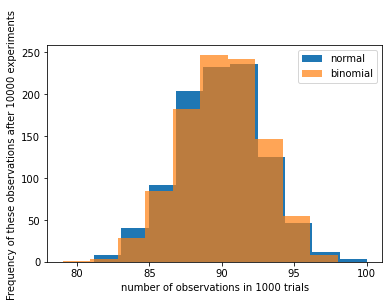

In [167]:
from numpy import random
import matplotlib.pyplot as plt
pp=0.9
nn=100
m1=pp*nn
vv=np.sqrt(nn*pp*(1-pp))

plt.hist(random.normal(loc=m1, scale=vv, size=1000),label='normal')
plt.hist(random.binomial(n=nn, p=pp, size=1000),label='binomial', alpha=0.7)
plt.xlabel("number of observations in 1000 trials")
plt.ylabel("Frequency of these observations after 10000 experiments ")
plt.legend()
plt.show()


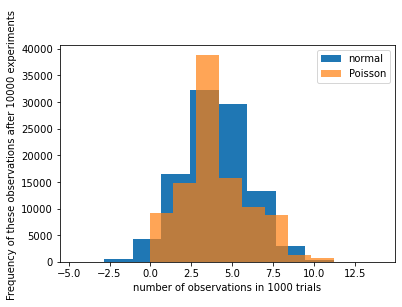

In [199]:
lam=4
m1=lam
vv=np.sqrt(lam)

plt.hist(random.normal(loc=m1, scale=vv, size=100000),label='normal')
plt.hist(random.poisson(lam=lam, size=100000),label='Poisson', alpha=0.7)
plt.xlabel("number of observations in 1000 trials")
plt.ylabel("Frequency of these observations after 10000 experiments ")
plt.legend()
plt.show()

### This distribution  is arguably the most well-known continuous probability distributions. This is in part because it is a limit for many other probability distributions, such as for example the Poisson distribution:


$P_{Poiss}(r;\lambda) \to P_{Gauss}(r;\lambda,\sqrt{\lambda})~\mathrm{as}~\lambda$ increases

### The approach towards a gaussian distribution os clearly visible.

### Also, the Gaussian distribution is extremely important in error handling, as almost all errors are Gaussian. 

# Student's t distribution

This distribution takes the name after N.S. Gossert who used \emph{Student} pseudonym to publish his results.
The distribution looks like


\begin{eqnarray}
f(t)=\frac{\Gamma\left( \frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left( \frac{\nu}{2}\right)}\left(1+\frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{eqnarray}


where $\Gamma$ is a function of the form
\begin{equation}
\Gamma(z)=\int_0^{\infty}x^{z-1}\exp(-x)dx
\end{equation}

We will use this distribution later for hypothesis testing.



The main features of the distribution are


1.  The mean $\langle x \rangle=0$ for $\nu> 1$

2. The variance is $V=\frac{\nu}{\nu-2}$ for $\nu>2$ and $\infty$ for $1\le\nu\le2$


In [200]:
from scipy.stats import t
import matplotlib.pyplot as plt

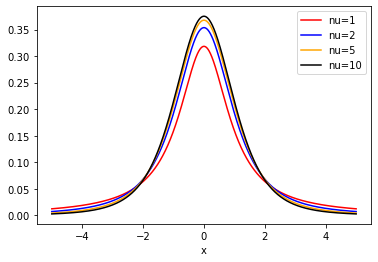

In [201]:
x = np.linspace(-5, 5, 3000)
y1=t.pdf(x, 1)
y2=t.pdf(x, 2)
y3=t.pdf(x, 3)
y4=t.pdf(x, 4)

plt.plot(x, y1, '-', color='red',label= 'nu=1'); 
plt.plot(x, y2, '-', color='blue',label= 'nu=2'); 
plt.plot(x, y3, '-', color='orange',label= 'nu=5'); 
plt.plot(x, y4, '-', color='black',label= 'nu=10'); 
plt.xlabel('x')
plt.legend()
plt.show()
#ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')

<img src="./limit.jpg"  width=850px height=650px />